# imports

In [56]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
 

# Creating DataFrame

In [57]:
data = {
    "Age": [29, 54, 37, 45, 63, 50, 48, None, 58, 42],
    "Cholesterol": [200, 230, 180, None, 240, 210, 190, 220, None, 205],
    "Max_Heart_Rate": [150, 120, 165, 140, 110, None, 155, 130, 125, 145],
    "Exercise_Induced_Angina": [True, False, False, True, True, False, True, False, True, None],
    "Heart_Disease": [1, 1, 0, 0, 1, 0, 1, 0, 1, 0],  # 1: Has disease, 0: No disease
}

In [58]:
df=pd.DataFrame(data)
df

,Age,Cholesterol,Max_Heart_Rate,Exercise_Induced_Angina,Heart_Disease
0,29.0,200.0,150.0,True,1
1,54.0,230.0,120.0,False,1
2,37.0,180.0,165.0,False,0
3,45.0,NaN,140.0,True,0
4,63.0,240.0,110.0,True,1
5,50.0,210.0,NaN,False,0
6,48.0,190.0,155.0,True,1
7,NaN,220.0,130.0,False,0
8,58.0,NaN,125.0,True,1
9,42.0,205.0,145.0,None,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      9 non-null      float64
 1   Cholesterol              8 non-null      float64
 2   Max_Heart_Rate           9 non-null      float64
 3   Exercise_Induced_Angina  9 non-null      object 
 4   Heart_Disease            10 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 532.0+ bytes


# Handling null values

In [60]:
df.isna().sum()

Age                        1
Cholesterol                2
Max_Heart_Rate             1
Exercise_Induced_Angina    1
Heart_Disease              0
dtype: int64

In [61]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Cholesterol']=df['Cholesterol'].fillna(math.floor(df['Cholesterol'].mean()))
df['Max_Heart_Rate']=df['Max_Heart_Rate'].fillna(df['Max_Heart_Rate'].median())
df['Exercise_Induced_Angina']=df['Exercise_Induced_Angina'].ffill()

C:\Users\JAGANNATH\AppData\Local\Temp\ipykernel_10192\4165253959.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Exercise_Induced_Angina']=df['Exercise_Induced_Angina'].ffill()


# Encoding

In [62]:
# label_encoder=LabelEncoder()
# df['Weather']=label_encoder.fit_transform(df['Weather'])

In [63]:
df['Exercise_Induced_Angina']=df['Exercise_Induced_Angina'].astype(int)

In [64]:
df

,Age,Cholesterol,Max_Heart_Rate,Exercise_Induced_Angina,Heart_Disease
0,29.0,200.0,150.0,1,1
1,54.0,230.0,120.0,0,1
2,37.0,180.0,165.0,0,0
3,45.0,209.0,140.0,1,0
4,63.0,240.0,110.0,1,1
5,50.0,210.0,140.0,0,0
6,48.0,190.0,155.0,1,1
7,29.0,220.0,130.0,0,0
8,58.0,209.0,125.0,1,1
9,42.0,205.0,145.0,1,0


# Splitting

In [65]:
y=df['Heart_Disease']
x=df.drop(columns=['Heart_Disease'])

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Scalling

In [67]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [68]:
x_train

array([[ 0.66920033,  0.18996836, -0.12019246, -1.29099445],
       [-1.30317959, -0.39454967,  0.520834  ,  0.77459667],
       [-1.30317959,  0.77448639, -0.76121893, -1.29099445],
       [-0.55179676, -1.56358573,  1.4823737 , -1.29099445],
       [-0.0821825 , -0.10229066,  0.20032077,  0.77459667],
       [ 1.89019743,  1.94352245, -2.04327185,  0.77459667],
       [ 0.19958606,  0.13151656, -0.12019246,  0.77459667],
       [ 0.48135462, -0.9790677 ,  0.84134723,  0.77459667]])

# Training

In [69]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [70]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
ann.fit(x_train,y_train,batch_size=16,epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.7866
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6250 - loss: 0.7844
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6250 - loss: 0.7823
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6250 - loss: 0.7801
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6250 - loss: 0.7780
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6250 - loss: 0.7759
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6250 - loss: 0.7738
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6250 - loss: 0.7717
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6250 - loss: 0.7696
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6250 - loss: 0.7676
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6250 - loss: 0.7655
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6250 - loss

# Evaluation

In [72]:
y_pred=ann.predict(x_test)
y_pred=y_pred>0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [73]:
y_pred=y_pred.astype(int)

In [74]:
cm=confusion_matrix(y_test,y_pred)

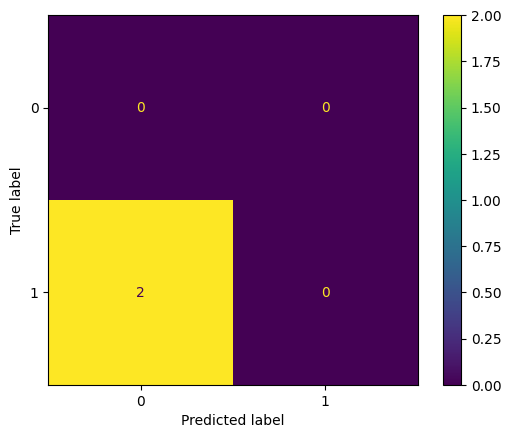

In [75]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()